In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import platform
#import SIRD_Model_Experimental
import SIRD_Model
from sklearn import linear_model


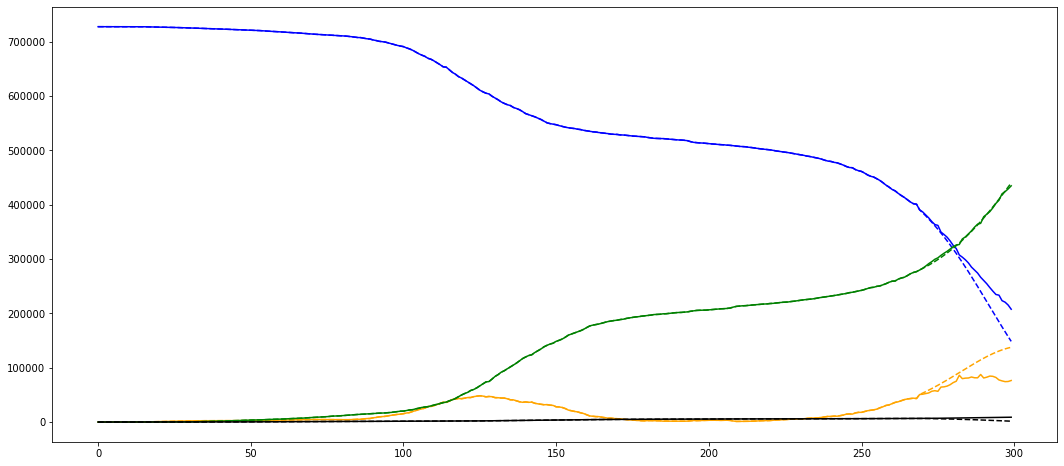

In [2]:
pathc="../Data/Covid Tracking State Data/"
# modify the path syntax based on the current platform
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "AZ.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

pop = 7279000
numDays = 300
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]

recovG = np.zeros(len(recov))
deadD = np.diff(dead)

for i in range(len(infect) - 14):
    recovG[i + 14] = infect[i] - deadD[i+13]
infect = infect - recovG - dead
#q=None #use this to have function automatically calculte q
#q = SIRD_Model.getQBasis(infect, recovG, dead, pop, qMax=.5)
q = 0.1
SIRD_Model.predictMatchBasis(infect, recovG, dead, pop, daysToPredict, qVal=q, smooth=False) #print with smoothing method


# Arkansas Guesstimate :)


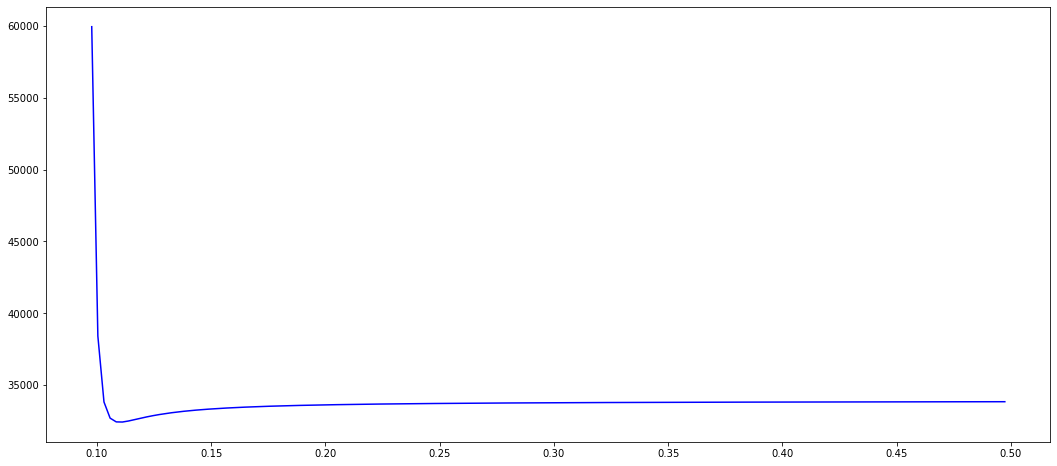

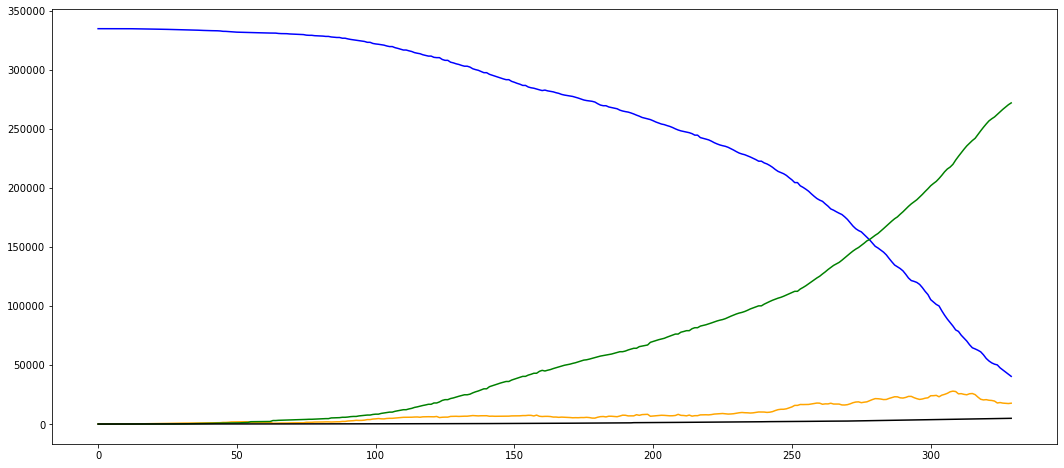

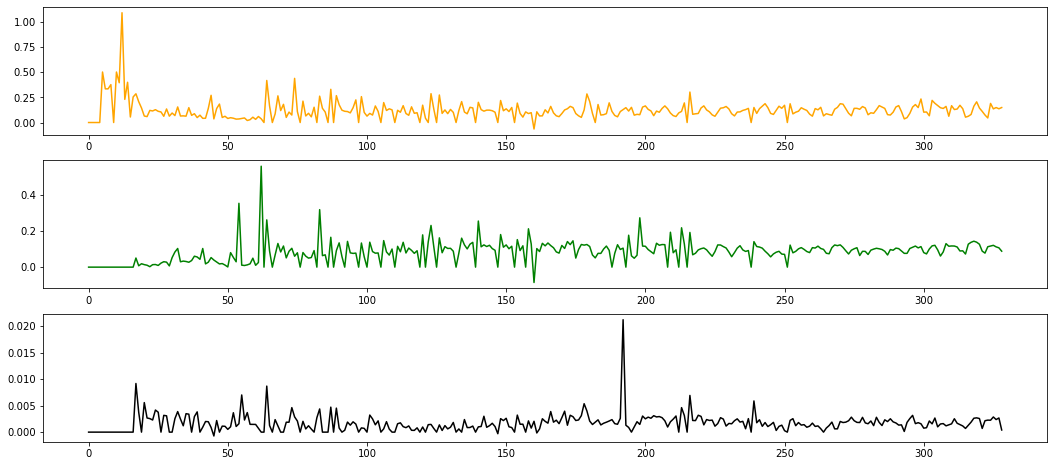

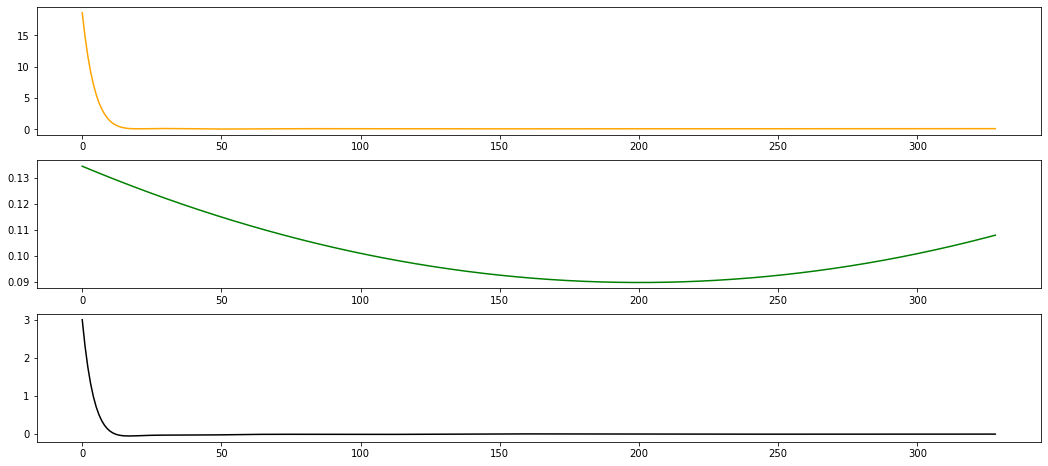

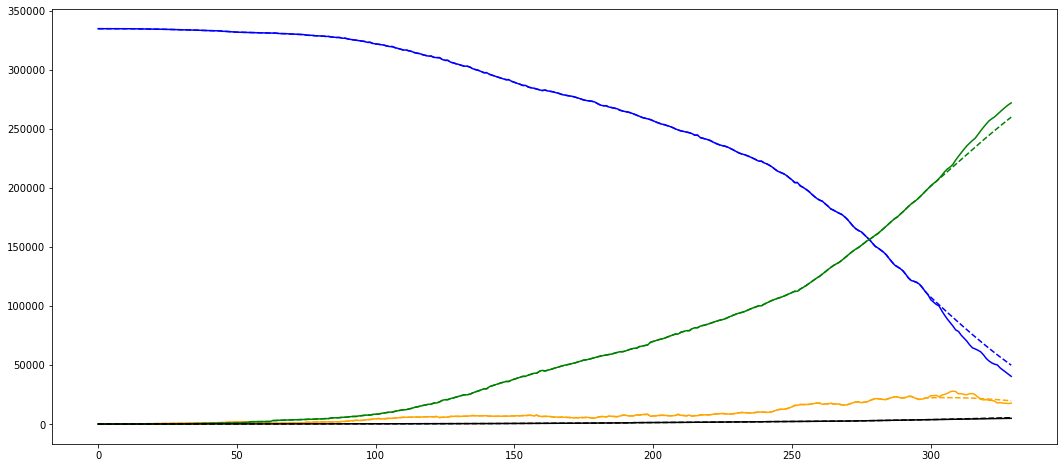

In [3]:
pathc="../Data/Covid Tracking State Data/"
# modify the path syntax based on the current platform
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "AR.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

pop = 3011000
numDays = 330
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
infect = infect - recov - dead
#q=None #use this to have function automatically calculte q
q = SIRD_Model.getQBasis(infect, recov, dead, pop, qMax=.5)
suscept = q*pop - infect - recov - dead
SIRD_Model.calculateAverageParams(infect,recov,dead,pop,q);
SIRD_Model.getBasisFunc(suscept, infect, recov, dead)
SIRD_Model.predictMatchBasis(infect, recov, dead, pop, daysToPredict, qVal = q, smooth=False) #print with smoothing method

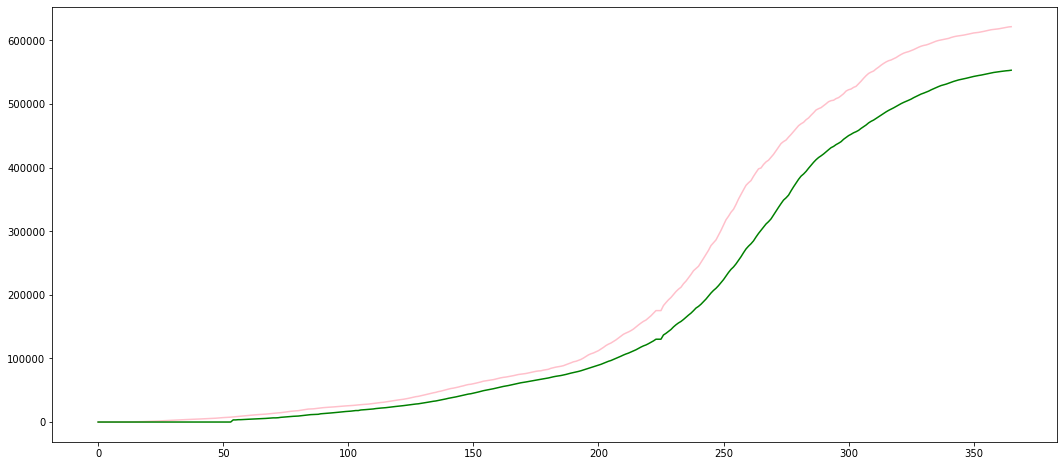

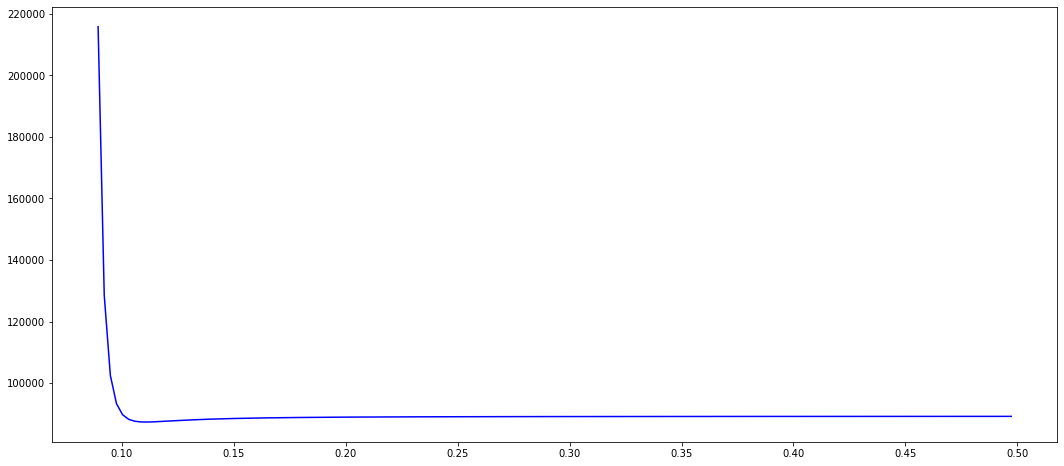

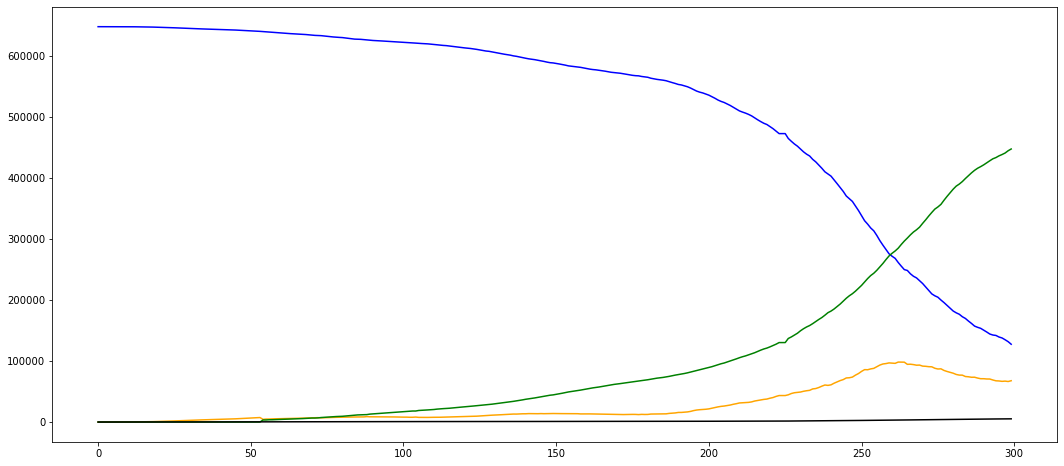

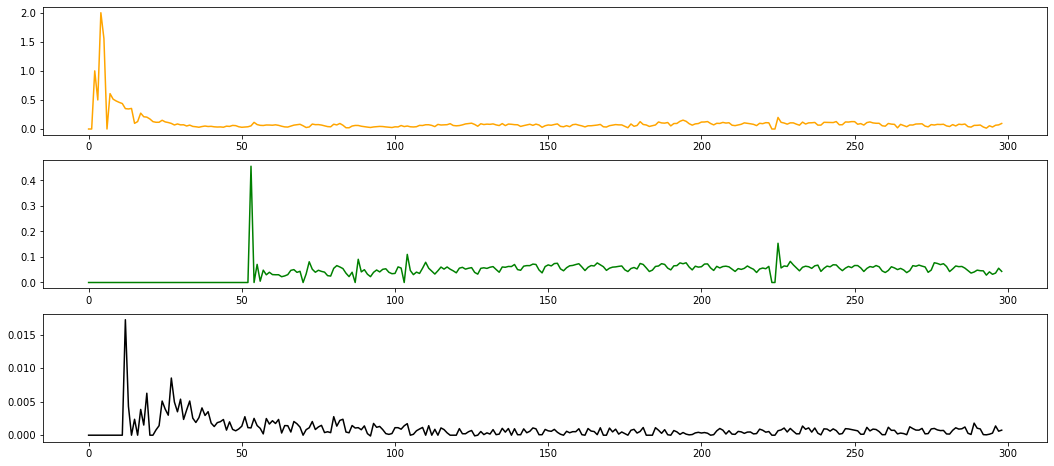

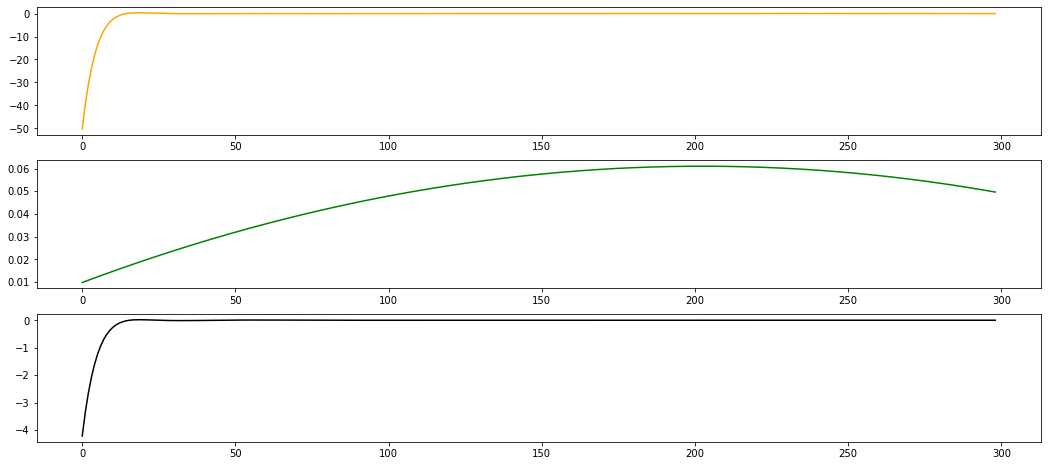

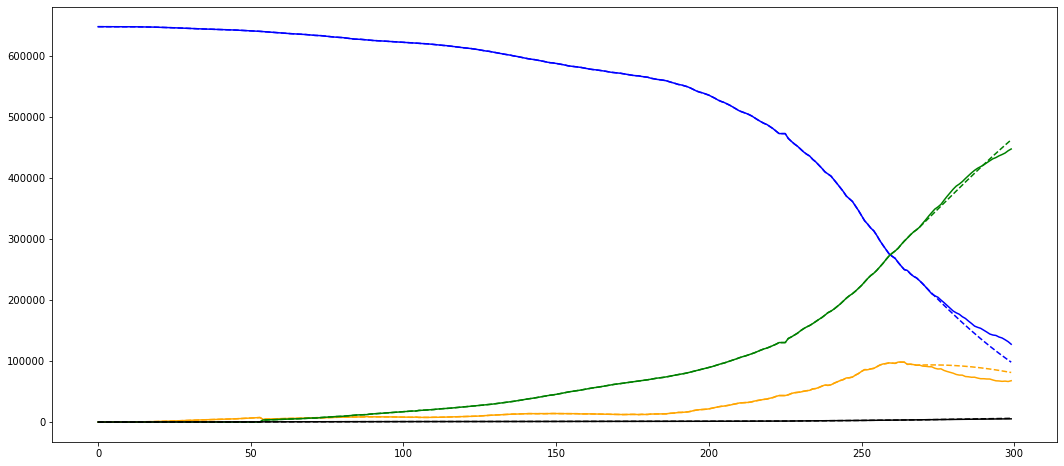

In [5]:
pathc="../Data/Covid Tracking State Data/"
# modify the path syntax based on the current platform
if platform.system() == "Windows":
    pathc.replace("/", "\\")

filename = "WI.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

pop = 5822000
numDays = 300
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
infect = infect - recov - dead
#q=None #use this to have function automatically calculte q
q = SIRD_Model.getQBasis(infect, recov, dead, pop, qMax=.5)

suscept = q*pop - infect - recov - dead
SIRD_Model.calculateAverageParams(infect,recov,dead,pop,q)
SIRD_Model.getBasisFunc(suscept, infect, recov, dead)
SIRD_Model.predictMatchBasis(infect, recov, dead, pop, daysToPredict, qVal = q, smooth=False) #print with smoothing method

# Trying to Estimate Recovered

0.04473534501252493
0.13290143137092533


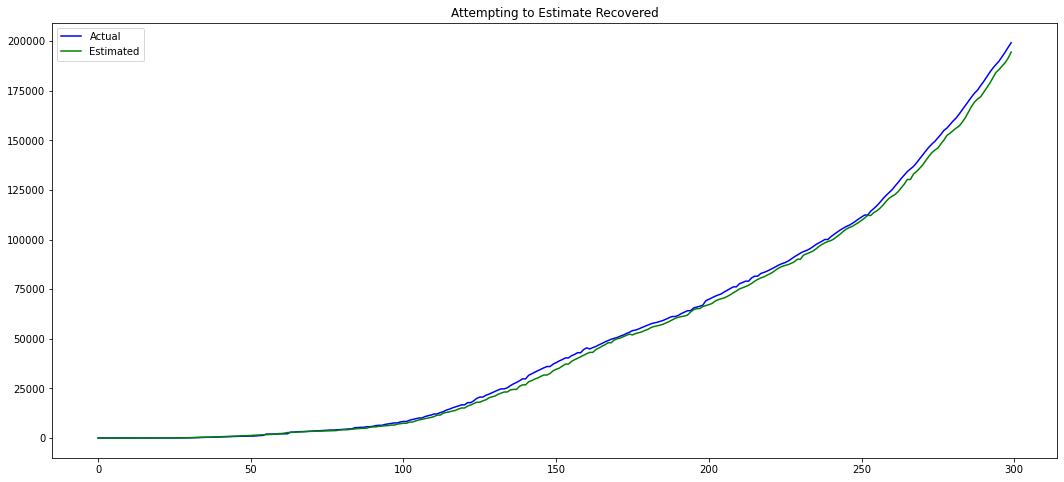

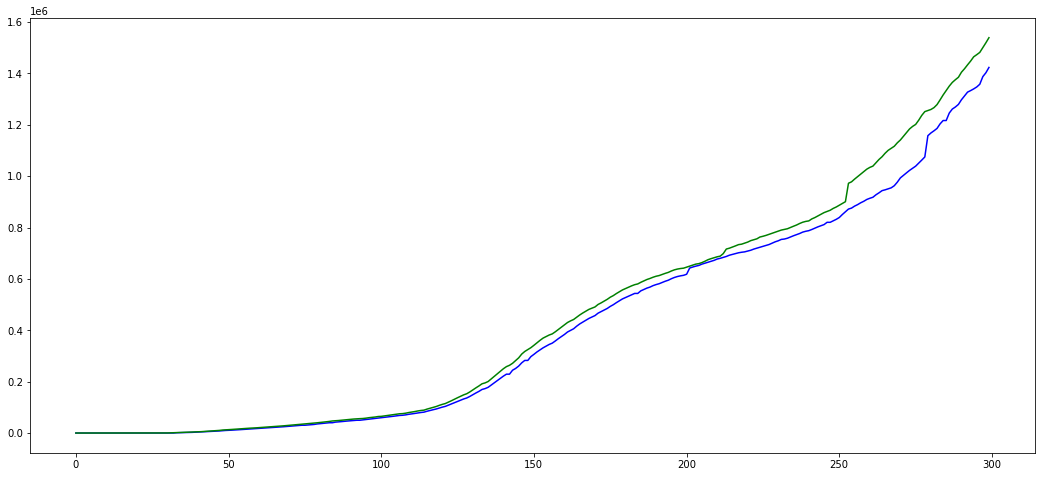

In [5]:
pathc="../Data/Covid Tracking State Data/"
# modify the path syntax based on the current platform
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "AR.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)


numDays = 300
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
recovG = np.zeros(len(recov))
deadD = np.diff(dead)
for i in range(len(infect) - 14):
    recovG[i + 14] = infect[i] - deadD[i+13]
    # 
infect = infect - recov - dead
temp = []
for i in range(len(recov)):
    temp.append((recovG[i]-recov[i])**2)
temp = np.array(temp)
temp = np.mean(temp)
temp = np.sqrt(temp)
bot = np.mean(recov)
print(temp/bot)
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(recov, color='blue', label = 'Actual') 
ax.plot(recovG, color = 'green', label = 'Estimated')
ax.set_title('Attempting to Estimate Recovered')
ax.legend()

if platform.system() == "Windows":
    pathc="..\\Data\\Covid Tracking State Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Covid Tracking State Data/"
    
filename = "TX.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

numDays = 300
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
recovG = np.zeros(len(recov))
deadD = np.diff(dead)
for i in range(len(infect) - 14):
    recovG[i + 14] = infect[i] - deadD[i+13]
infect = infect - recov - dead
temp = []
for i in range(len(recov)):
    temp.append((recovG[i]-recov[i])**2)
temp = np.array(temp)
temp = np.mean(temp)
temp = np.sqrt(temp)
bot = np.mean(recov)
print(temp/bot)
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(recov, color='blue') 
ax.plot(recovG, color = 'green')

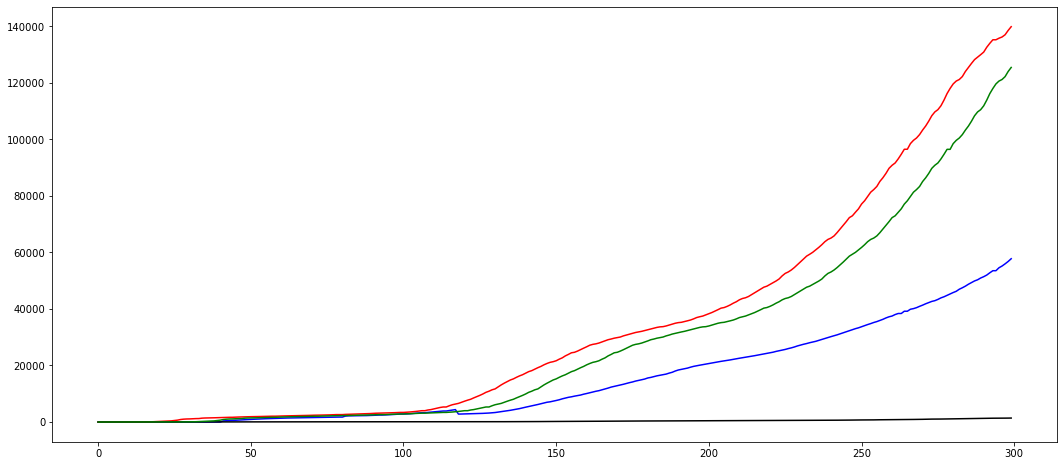

In [6]:
pathc="../Data/Covid Tracking State Data/"
# modify the path syntax based on the current platform
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "ID.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

numDays = 300
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
recovG = np.zeros(len(recov))
deadD = np.diff(dead)
for i in range(len(infect) - 14):
    recovG[i + 14] = infect[i] - deadD[i+13]
#infect = infect - recovG - dead

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(recov, color='blue') 
ax.plot(infect, color = 'red')
ax.plot(dead, color = 'black')
ax.plot(recovG, color = 'green')

In [7]:
print(deadD)
print(dead)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  1.  1.  1.  1.  2.  0.  0.  1.  0.  0.  3.  2.  3.  6.  1.  2.
  0.  6.  6.  2.  0.  2.  1.  1.  3.  3.  3.  0.  0.  2.  0.  2.  2.  0.
  3.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  3. -1.  0.  3.  1.  0.  0.
  1.  3.  0.  0.  2.  0.  0.  0.  2.  1.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  2.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  4.  2.  1.
  1.  0.  0.  1.  7.  4.  4.  1.  0.  3.  4.  9.  3.  6.  2.  0.  6.  8.
 13.  4. 12.  8.  0.  3. 10.  7.  6.  6.  6.  2.  2.  7.  0.  5. 14.  4.
  0.  4.  9.  9.  7.  6.  2.  1.  7. 12. 11.  6. 10.  5.  1.  2.  7.  4.
  0. 10.  2.  1.  0.  4. 17.  1.  5.  3.  0.  4.  4.  6.  5.  4.  3.  2.
  4.  4.  3.  3.  1.  2.  0.  0.  4.  5.  3.  2.  6.  2.  5.  5.  8.  3.
  3.  1.  0.  3.  2.  4.  1.  6.  6. -1.  3.  4. 11.  7.  9. 10.  1.  7.
  5. 14. 16. 11.  3.  1.  2. 15. 17.  7.  8.  4.  3